In [1]:
import pandas as pd
import numpy as np
from datetime import datetime

# url = "../data/AirPassengers.csv" 如果把这个仓库下载后可以使用这个地址
# 如果后面有发现文件读不出来，可以自己手工把 .. 换成 https://raw.githubusercontent.com/liuhui998/time-series-little-book/master
# 但是这需要挂了 VPN, 因为课件还在开发过程中，大家多包涵
url = "../data/AirPassengers.csv"
dateparse = lambda dates: datetime.strptime(dates, '%Y-%m')
data = pd.read_csv(url, parse_dates=['Month'], index_col='Month',date_parser=dateparse)
data.head()

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [2]:
# 因为周期为 12个月，test_num 就为12
test_num = 12 
train = data.iloc[0:-test_num,:]
print(train.shape)
test = data.iloc[-test_num:,:]
fcst_df = pd.DataFrame({
    'train': train['Passengers'],
    'test' : test['Passengers']
})
fcst_df.describe()

(132, 1)


,train,test
count,132.000000,12.000000
mean,262.492424,476.166667
std,106.625799,77.737125
min,104.000000,390.000000
25%,176.500000,418.500000
50%,239.500000,461.000000
75%,343.250000,514.750000
max,559.000000,622.000000


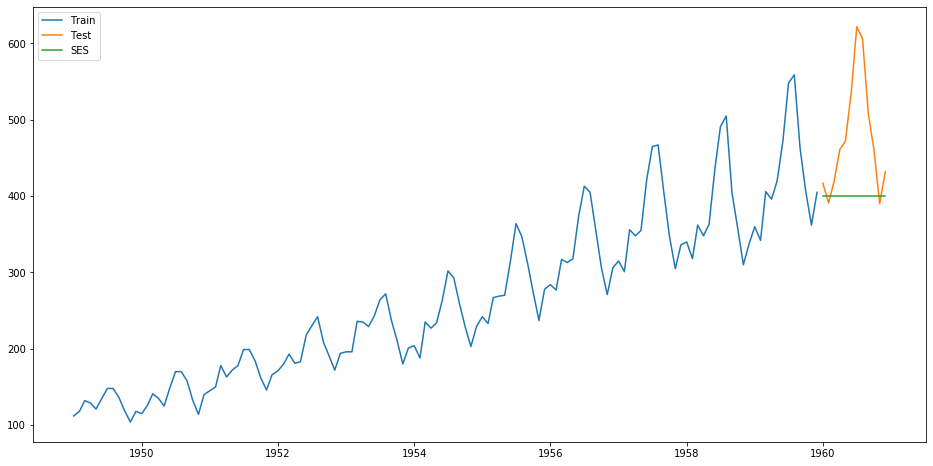

In [5]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
import matplotlib.pyplot as plt 

y_hat_avg = test.copy()
fit2 = SimpleExpSmoothing(np.asarray(train['Passengers'])).fit(smoothing_level=0.6,optimized=False)
y_hat_avg['SES'] = fit2.forecast(len(test))
plt.figure(figsize=(16,8))
plt.plot(train['Passengers'], label='Train')
plt.plot(test['Passengers'], label='Test')
plt.plot(y_hat_avg['SES'], label='SES')
plt.legend(loc='best')
plt.show()


In [ ]:
import cufflinks as cf

fcst_value = train['Passengers'].mean()
fcst_series = pd.Series(fcst_value,index = test.index)
fcst_df['fcst'] = fcst_series
new_fcst_fig = fcst_df.iplot(asFigure = True, xTitle="时间",yTitle="乘客数量", title="预测最近一年航空乘客数")
new_fcst_fig.show('svg')